**Objective**:
Implementing Stochastic Gradient Descent from scratch for Linear Regression

**Some Terminologies** (references at the bottom)
1. **Gradient** means the rate of inclination or declination of a slope.
2. **Descent** means the instance of descending.
3. **iterative** means that we need to get the results multiple times to get the most optimal result. 
4. One **epoch** is when an ENTIRE dataset is passed to the model
5. **batch size** is the number of training examples present in a single batch
6. **Iterations** is the number of batches needed to complete one epoch.

**Note:** The number of batches is equal to number of iterations for one epoch.

**Example:** Let’s say we have 2000 training examples that we are going to use .

We can divide the dataset of 2000 examples into batches of 500 then it will take 4 iterations to complete 1 epoch. Where Batch Size is 500 and Iterations is 4, for 1 complete epoch.

In Gradient Descent, the weights are updated after all the training data has been passed through the model. In Stochastic Gradient Descent, the weights are updated after each sample passes the model. The samples are updated after every epoch.

In [1]:
import warnings
warnings.filterwarnings("ignore")
from sklearn.datasets import load_boston
from random import seed
from random import randrange
from csv import reader
from math import sqrt
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from prettytable import PrettyTable
from sklearn.linear_model import SGDRegressor
from sklearn import preprocessing
from sklearn.metrics import mean_squared_error

np.random.seed(507)  

In [2]:
# loading the inbuilt boston housing dataset
from sklearn.datasets import load_boston   
boston = load_boston()

In [3]:
# Shape of the data
#print(boston.data.shape)

# print the column names
#print(boston.feature_names)

# print the target data
#print(boston.target)

#print(boston.DESCR)

# converting the boston dataset into dataframe
import pandas as pd
boston_df = pd.DataFrame(boston.data)
print(boston_df.head())

        0     1     2    3      4      5     6       7    8      9     10  \
0  0.00632  18.0  2.31  0.0  0.538  6.575  65.2  4.0900  1.0  296.0  15.3   
1  0.02731   0.0  7.07  0.0  0.469  6.421  78.9  4.9671  2.0  242.0  17.8   
2  0.02729   0.0  7.07  0.0  0.469  7.185  61.1  4.9671  2.0  242.0  17.8   
3  0.03237   0.0  2.18  0.0  0.458  6.998  45.8  6.0622  3.0  222.0  18.7   
4  0.06905   0.0  2.18  0.0  0.458  7.147  54.2  6.0622  3.0  222.0  18.7   

       11    12  
0  396.90  4.98  
1  396.90  9.14  
2  392.83  4.03  
3  394.63  2.94  
4  396.90  5.33  


In [4]:
# Creating independent variable X and dependent variable y out of the boston data
X = boston.data
y = boston.target

**Standardize the data**: We will standardize the data so that our sgd converges faster


In [5]:
# Standardizing the data
standardised_boston_data = StandardScaler().fit_transform(X)

**Stochastic Gradient Descent from scratch**

1. Pick random example.
2. Train on it. Adjust params immediately.
3. Repeat step 1 and 2 until best weights are obtained that reduce the error.

The equation of linear regression is given by:

**y = W0 + W1.x1 + W2.x2 + .. + WnXn**

Here,

* **n** is the number of features 
* **W** is the weight of each feature x
* **y** is the dependent variable

We can express the above equation as the dot-product of W and X, but there is a missing term x0. As a result, the length of W and X wont match.So we will create a vector x0 that will contain ones and concatenate it to existing X.

In [6]:
# Shape before adding x0
standardised_boston_data.shape

(506, 13)

In [7]:
# Adding feature x0 which contains 1 to existing standardized X_train using np.c_
standardised_boston_data = np.c_[np.ones((standardised_boston_data.shape[0], 1)), standardised_boston_data]  

In [8]:
standardised_boston_data.shape

(506, 14)

In [9]:
# Shape after adding x0
standardised_boston_data.shape

(506, 14)

In [10]:
# take a look at the X_train data
standardised_boston_data[0:2]

array([[ 1.        , -0.41978194,  0.28482986, -1.2879095 , -0.27259857,
        -0.14421743,  0.41367189, -0.12001342,  0.1402136 , -0.98284286,
        -0.66660821, -1.45900038,  0.44105193, -1.0755623 ],
       [ 1.        , -0.41733926, -0.48772236, -0.59338101, -0.27259857,
        -0.74026221,  0.19427445,  0.36716642,  0.55715988, -0.8678825 ,
        -0.98732948, -0.30309415,  0.44105193, -0.49243937]])

In [11]:
y[0:10]

array([24. , 21.6, 34.7, 33.4, 36.2, 28.7, 22.9, 27.1, 16.5, 18.9])

**Now we have shape of X same as our weight vector W**

In [12]:
# Initialising weight vector with normally distributed values of shape of the features of X
W = np.random.normal(0,1,standardised_boston_data.shape[1])

In [13]:
# best W as per theory
W_best_theory = np.linalg.inv(standardised_boston_data.T.dot(standardised_boston_data)).dot(standardised_boston_data.T).dot(y)
W_best_theory

array([ 2.25328063e+01, -9.28146064e-01,  1.08156863e+00,  1.40899997e-01,
        6.81739725e-01, -2.05671827e+00,  2.67423017e+00,  1.94660717e-02,
       -3.10404426e+00,  2.66221764e+00, -2.07678168e+00, -2.06060666e+00,
        8.49268418e-01, -3.74362713e+00])

In [ ]:
from tqdm import tqdm

**1. Implement your own version of SGDRegressor**

In [23]:
def gradient_descent(X, y, W, learning_rate):
    
    from sklearn.metrics import mean_squared_error
    import numpy as np
    weights = W
    b_curr = 0
    iterations = 10000
    n = m = float(len(y))
 
    
    for i in range(iterations):
        y_pred = X.dot(weights)
        
        cost_function = mean_squared_error(y_pred, y)       # Cost function taken is MSE
        weight_derivative = 2 * X.T.dot(X.dot(weights) - y)          
               
        weights = weights - (learning_rate * weight_derivative)
        if i % 1000 == 0:  #10000
            #learning_rate= learning_rate/2
            print('iteration: {}, cost: {}'.format(i, cost_function))
            #print('y', y)
            #print('X', X)
    return weights    

In [24]:
new_weights = gradient_descent(standardised_boston_data, y, W, learning_rate= 0.0001)  
new_weights

iteration: 0, cost: 629.4371378641337
iteration: 1000, cost: 21.894834201406763
iteration: 2000, cost: 21.894831181736777
iteration: 3000, cost: 21.894831181729206
iteration: 4000, cost: 21.894831181729202
iteration: 5000, cost: 21.894831181729206
iteration: 6000, cost: 21.894831181729206
iteration: 7000, cost: 21.894831181729206
iteration: 8000, cost: 21.894831181729206
iteration: 9000, cost: 21.894831181729206


array([ 2.25328063e+01, -9.28146064e-01,  1.08156863e+00,  1.40899997e-01,
        6.81739725e-01, -2.05671827e+00,  2.67423017e+00,  1.94660717e-02,
       -3.10404426e+00,  2.66221764e+00, -2.07678168e+00, -2.06060666e+00,
        8.49268418e-01, -3.74362713e+00])

**2. Plot a chart of predicted values vs actual values of your own SGD implementation**

In [26]:
y_pred_new = standardised_boston_data.dot(new_weights)
#y_pred_new

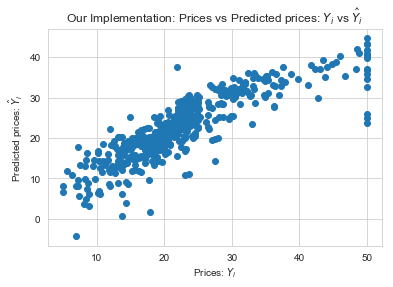

In [61]:
# code source:https://medium.com/@haydar_ai/learning-data-science-day-9-linear-regression-on-boston-housing-dataset-cd62a80775ef
plt.scatter(y, y_pred_new)
plt.xlabel("Prices: $Y_i$")
plt.ylabel("Predicted prices: $\hat{Y}_i$")
plt.title("Our Implementation: Prices vs Predicted prices: $Y_i$ vs $\hat{Y}_i$")
plt.show()

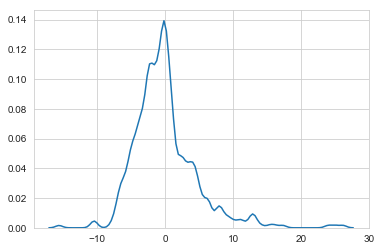

In [28]:
delta_y = y - y_pred_new

import seaborn as sns;
import numpy as np;
sns.set_style('whitegrid')
sns.kdeplot(np.array(delta_y), bw=0.5)
plt.show()

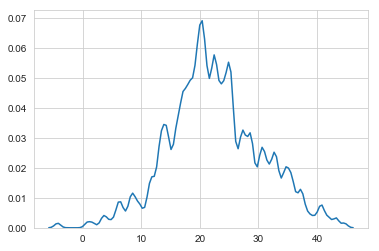

In [29]:
sns.set_style('whitegrid')
sns.kdeplot(np.array(y_pred_new), bw=0.5)
plt.show()

**3. Try sklearn SGDRegressor and plot a chart of predicted values vs actual values**

In [59]:
clf = SGDRegressor()
clf.fit(standardised_boston_data, y)
y_pred_sgd = clf.predict(standardised_boston_data)

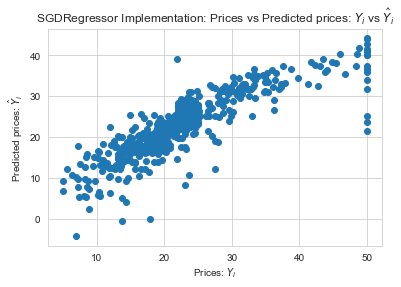

In [62]:
# code source:https://medium.com/@haydar_ai/learning-data-science-day-9-linear-regression-on-boston-housing-dataset-cd62a80775ef
plt.scatter(y, y_pred_sgd)
plt.xlabel("Prices: $Y_i$")
plt.ylabel("Predicted prices: $\hat{Y}_i$")
plt.title("SGDRegressor Implementation: Prices vs Predicted prices: $Y_i$ vs $\hat{Y}_i$")
plt.show()

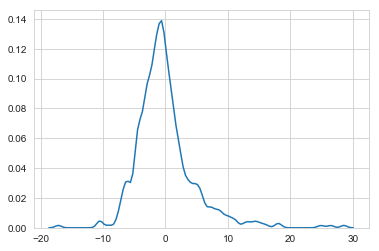

In [63]:
delta_y = y - y_pred_sgd

import seaborn as sns;
import numpy as np;
sns.set_style('whitegrid')
sns.kdeplot(np.array(delta_y), bw=0.5)
plt.show()

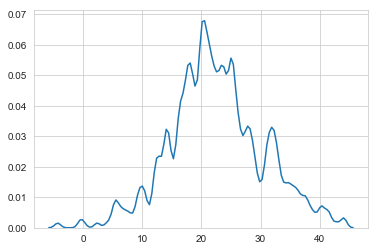

In [65]:
sns.set_style('whitegrid')
sns.kdeplot(np.array(y_pred_sgd), bw=0.5)
plt.show()

**4. Compare weights from your implementation with SGDRegressor**

In [31]:
# Weights from SGDRegressor
print(clf.coef_)

[11.2174002  -0.66393316  0.7497664  -0.24136469  0.787859   -0.85339866
  3.11119844 -0.29189204 -2.17892926  0.93258773 -0.68137105 -1.71991135
  0.91874577 -3.41834437]


In [44]:
from prettytable import PrettyTable
t1 = PrettyTable()
#t1.field_names = ['Predicted Weights', 'SGDRegressor Weights']
t1.add_column("Predicted Weights", new_weights)
t1.add_column('SGDRegressor Weights', clf.coef_)

print(t1)    
del t1

+----------------------+----------------------+
|  Predicted Weights   | SGDRegressor Weights |
+----------------------+----------------------+
|  22.532806324110666  |  11.217400204808976  |
| -0.9281460643011963  | -0.6639331580390468  |
|  1.0815686278223753  |  0.7497663951081511  |
|  0.1408999969042694  | -0.2413646909656736  |
|  0.6817397247778005  |  0.7878590018721183  |
|  -2.056718266005212  | -0.8533986612431524  |
|  2.6742301652393268  |  3.1111984444947542  |
| 0.019466071657037825 | -0.2918920414447237  |
| -3.1040442580864442  |  -2.178929263216641  |
|  2.662217642473595   |  0.9325877305231811  |
|  -2.07678168384335   | -0.6813710528512208  |
| -2.0606066589067598  |  -1.71991135192851   |
|  0.849268417705332   |  0.918745766920896   |
| -3.7436271264671057  | -3.4183443738561174  |
+----------------------+----------------------+


**5. Compare MSE of your implementation and SGDRegressor**

In [58]:
sgdregressor_mse = mean_squared_error(y, clf.predict(standardised_boston_data))
print("SGDRegressor MSE: {}".format(sgdregressor_mse))

our_sgd_implementation = mean_squared_error(y_pred_new, y)
print("Our SGD's MSE: {}".format(our_sgd_implementation))

SGDRegressor MSE: 22.700680326716487
Our SGD's MSE: 21.894831181729206


**Conclusion:**

* Without standardizing data, I ran into error but standardizing helped in convergence.
* With 10000 and a learning rate of 0.0001, we got an MSE of 21.9 close to SGDRegressor's MSE of 22.70
* Our SGD gave pretty much the same MSE for the Boston Housing Dataset.


**Reading material:**

* https://towardsdatascience.com/how-to-make-sgd-classifier-perform-as-well-as-logistic-regression-using-parfit-cc10bca2d3c4
* https://towardsdatascience.com/epoch-vs-iterations-vs-batch-size-4dfb9c7ce9c9